In [1]:
import os
import warnings
import pandas as pd
from statsbombpy import sb
import matplotsoccer
pd.set_option('display.max_columns', None)
warnings.filterwarnings(action="ignore", message="credentials were not supplied. open data access only")

In [2]:
# 決勝（イングランド vs スペイン）
match_id=3943043

In [3]:
lineup = sb.lineups(match_id=match_id)['England']
played_lineup = lineup[lineup['positions'].apply(lambda x: len(x) != 0)]
played_lineup

,player_id,player_name,player_nickname,jersey_number,country,cards,positions
1,3205,Kyle Walker,None,2,England,[],"[{'position_id': 2, 'position': 'Right Back', ..."
2,3244,John Stones,None,5,England,"[{'time': '52:31', 'card_type': 'Yellow Card',...","[{'position_id': 3, 'position': 'Right Center ..."
4,3382,Luke Shaw,None,3,England,[],"[{'position_id': 6, 'position': 'Left Back', '..."
5,3468,Jordan Pickford,None,1,England,[],"[{'position_id': 1, 'position': 'Goalkeeper', ..."
9,3834,Ivan Toney,None,17,England,[],"[{'position_id': 21, 'position': 'Left Wing', ..."
10,3943,Declan Rice,None,4,England,[],"[{'position_id': 11, 'position': 'Left Defensi..."
12,4354,Phil Foden,None,11,England,[],"[{'position_id': 19, 'position': 'Center Attac..."
13,4760,Ollie Watkins,None,19,England,"[{'time': '90:54', 'card_type': 'Yellow Card',...","[{'position_id': 23, 'position': 'Center Forwa..."
16,10955,Harry Kane,None,9,England,"[{'time': '24:38', 'card_type': 'Yellow Card',...","[{'position_id': 23, 'position': 'Center Forwa..."
17,22084,Bukayo Saka,None,7,England,[],"[{'position_id': 17, 'position': 'Right Wing',..."


In [4]:
shots = sb.events(match_id=match_id).query('type=="Shot"')
shots.head()

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,dribble_nutmeg,dribble_outcome,dribble_overrun,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_offensive,foul_won_advantage,foul_won_defensive,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_outcome,goalkeeper_position,goalkeeper_technique,goalkeeper_type,id,index,injury_stoppage_in_chain,interception_outcome,location,match_id,minute,off_camera,out,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_cut_back,pass_end_location,pass_goal_assist,pass_height,pass_inswinging,pass_length,pass_no_touch,pass_outcome,pass_outswinging,pass_recipient,pass_recipient_id,pass_shot_assist,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_deflected,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_one_on_one,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
3228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3787ac1c-b077-4960-b717-ce3e7361f8a4,490,NaN,NaN,"[115.6, 28.4]",3943043,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,From Free Kick,Nicholas Williams Arthuer,68574.0,Left Wing,21,Spain,772,"[29cfd49e-0efa-4bf1-858f-d7d05a555507, 2ccb003...",13,NaN,Left Foot,NaN,"[116.0, 29.3]",NaN,"[{'location': [118.3, 36.0], 'player': {'id': ...",58f991d4-fef8-47d4-a7d3-bfcb2ea6b078,True,Blocked,0.068030,Normal,Open Play,NaN,NaN,NaN,NaN,NaN,Spain,772,00:11:13.568,Shot,True
3229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.072991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c825856a-5a21-4507-b9e2-ea07b5bf4cca,500,NaN,NaN,"[112.9, 36.2]",3943043,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,From Corner,Robin Aime Robert Le Normand,22128.0,Right Center Back,22,Spain,772,"[0b354f36-d30a-4455-b47d-31594c752317, 1dd307e...",21,NaN,Right Foot,NaN,"[120.0, 29.8, 0.5]",True,"[{'location': [116.0, 40.4], 'player': {'id': ...",0c0e6467-4ce7-4a32-9de2-da2ed79db032,NaN,Off T,0.117465,Overhead Kick,Open Play,NaN,NaN,NaN,NaN,NaN,Spain,772,00:12:21.652,Shot,True
3230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.076667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dd4098ae-cd79-4d2a-9717-e95b5fd21674,608,NaN,NaN,"[96.2, 40.8]",3943043,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,From Corner,Declan Rice,3943.0,Left Defensive Midfield,27,England,768,"[a613c9f6-ffab-44b4-bf5c-20c25175f827, cc9bfa1...",20,NaN,Right Foot,NaN,"[98.5, 40.8]",True,"[{'location': [103.6, 56.5], 'player': {'id': ...",86536f69-41fc-4585-b5ee-7a68d6dd4b32,NaN,Blocked,0.048995,Normal,Open Play,NaN,NaN,NaN,NaN,NaN,England,768,00:16:20.810,Shot,True
3231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.178330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7f58b69c-8311-493f-91dd-d2a57ac07387,1047,NaN,NaN,"[101.2, 49.8]",3943043,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,From Throw In,Fabián Ruiz Peña,6655.0,Left Defensive Midfield,44,Spain,772,"[9b11e9f2-cd08-4cc2-9120-c319cb8eeedf, be39808...",27,NaN,Right Foot,True,"[117.9, 42.7, 1.5]",NaN,"[{'location': [104.7, 58.0], 'player': {'id': ...",f21c2c5a-aa37-49ea-aad1-d399d5569c88,NaN,Saved,0.048117,Normal,Open Play,NaN,NaN,NaN,NaN,NaN,Spain,772,00:27:27.

In [5]:
shots.columns

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'block_save_block',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'injury_stoppage_in_chain',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_end_location',
       'pass_goal_assist

In [6]:
shots.shape

(25, 92)

In [7]:
def draw_each_shot():
    shots = sb.events(match_id=match_id).query('type=="Shot"')
    
    df1 = pd.DataFrame(shots["location"].tolist(), columns=['location_x', 'location_y'])
    # locationの補正
    df1['location_x'] = df1['location_x'] * 105 / 120
    df1['location_y'] = 68 - df1['location_y'] * 68 / 80
    
    df2 = pd.DataFrame(shots["shot_end_location"].tolist(), columns=['shot_end_location_x', 'shot_end_location_y', 'shot_end_location_z'])
    # locationの補正
    df2['shot_end_location_x'] = df2['shot_end_location_x'] * 105 / 120
    df2['shot_end_location_y'] = 68 - df2['shot_end_location_y'] * 68 / 80
    
    shots = shots.reset_index(drop=True)
    fixed_shots = pd.concat([shots, df1, df2], axis=1)
    # fixed_shots = pd.concat([fixed_shots, df2], axis=1)
    fixed_shots
    # print(fixed_shots.shape)
    # fixed_shots['location_x', 'location_y', 'shot_end_location_x', 'shot_end_location_y']
    # fixed_shots.loc[:, ['location_x', 'location_y', 'shot_end_location_x', 'shot_end_location_y']]
    
    for index, shot in fixed_shots.iterrows():
        print(shot['player'])
        print(shot.minute)
        print(shot.shot_outcome)
        print(shot.shot_statsbomb_xg)
        ax = matplotsoccer.actions(
            location=shot.to_frame().T.loc[:, ['location_x', 'location_y', 'shot_end_location_x', 'shot_end_location_y']],
            # action_type=passes.type.map(lambda x: 'pass'), # 'Pass'だと表示が四角になってしまう...
            # result=all_passes['pass_outcome'].isnull(),
            zoom=False,
            figsize=6,
            show_legend=False
        )

Nicholas Williams Arthuer
11
Blocked
0.06802966


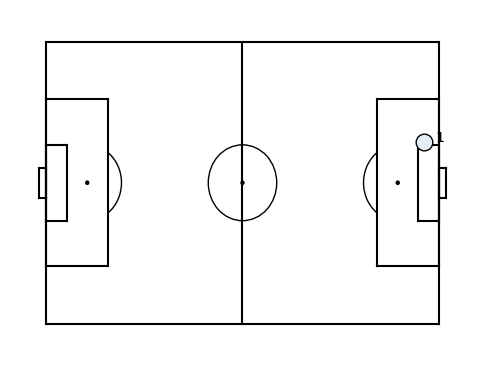

Robin Aime Robert Le Normand
12
Off T
0.11746518


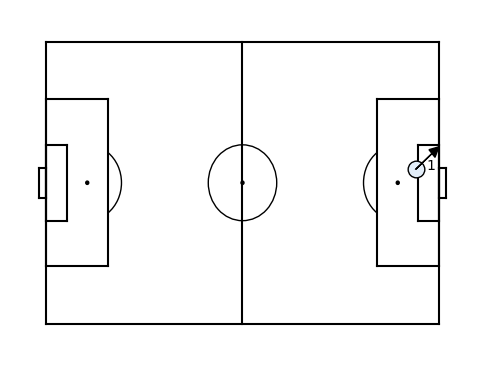

Declan Rice
16
Blocked
0.0489952


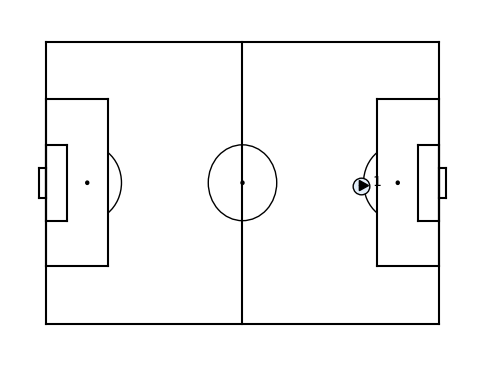

Fabián Ruiz Peña
27
Saved
0.048117142


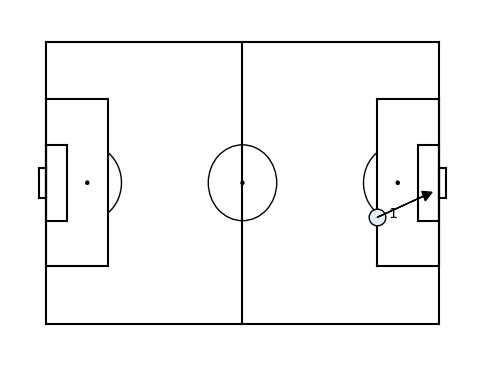

Daniel Olmo Carvajal
34
Blocked
0.02654902


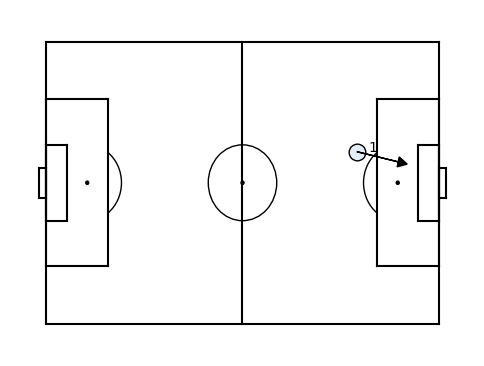

Álvaro Borja Morata Martín
42
Blocked
0.07835983


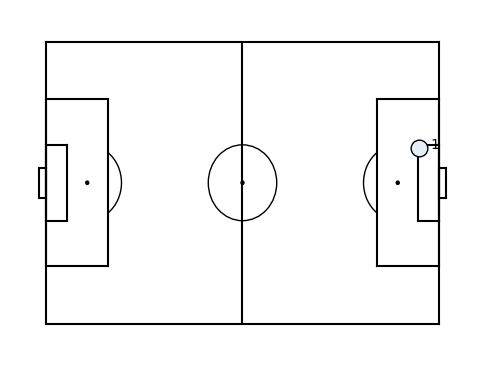

Harry Kane
44
Blocked
0.048372418


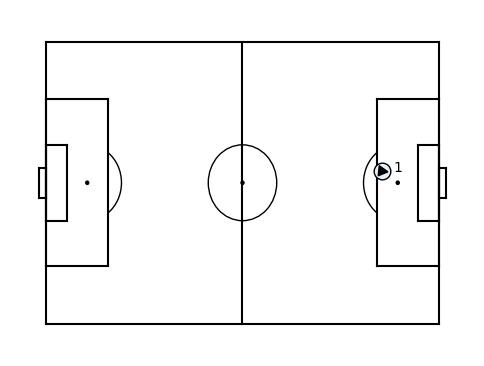

Phil Foden
45
Saved
0.1796937


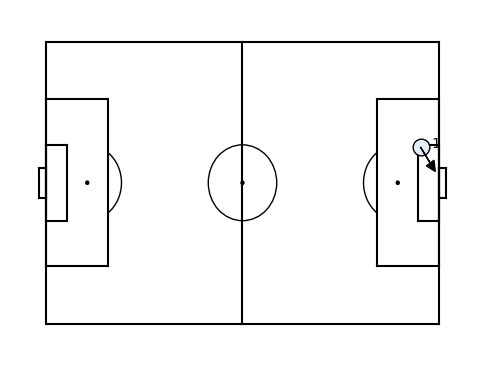

Nicholas Williams Arthuer
46
Goal
0.1124816


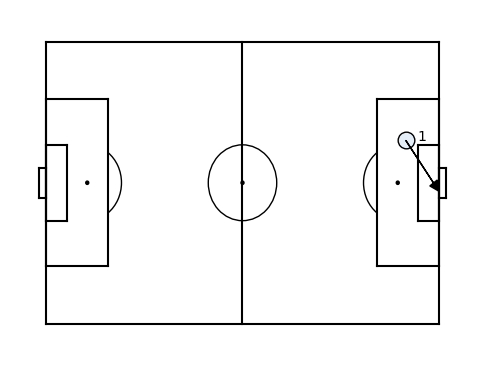

Daniel Olmo Carvajal
48
Off T
0.2455793


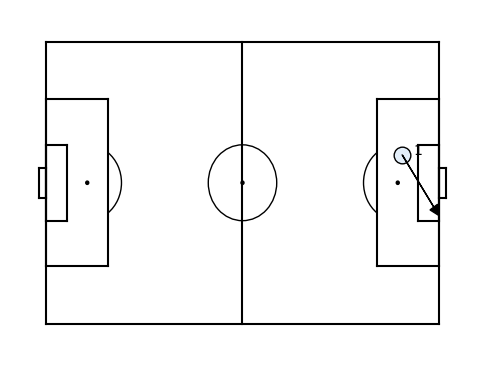

Álvaro Borja Morata Martín
54
Blocked
0.02528921


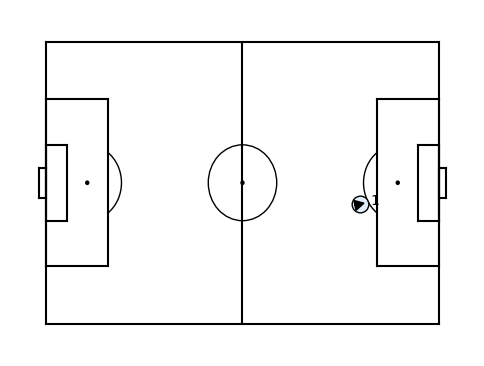

Álvaro Borja Morata Martín
54
Wayward
0.24310583


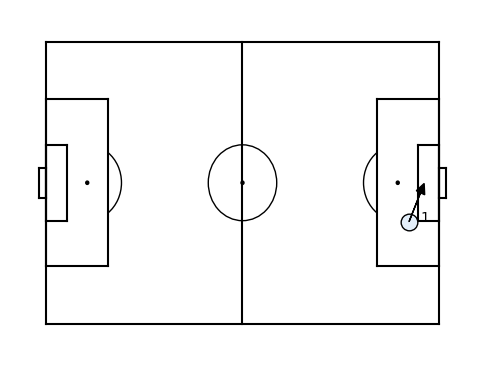

Nicholas Williams Arthuer
55
Off T
0.04913289


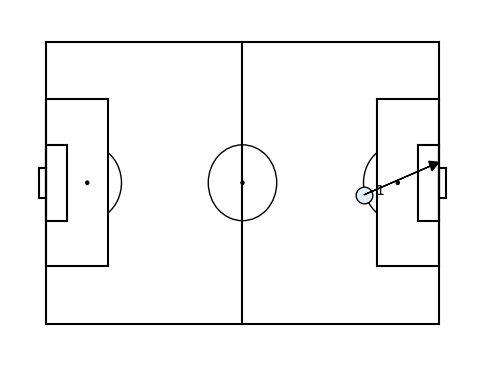

Jude Bellingham
63
Off T
0.05628593


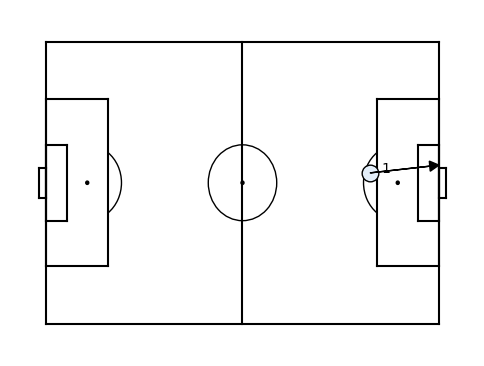

Lamine Yamal Nasraoui Ebana
65
Saved
0.16213313


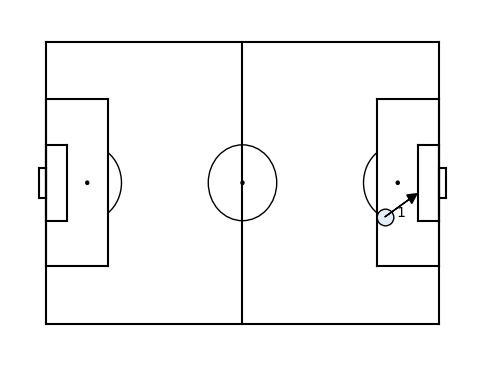

Aymeric Laporte
66
Blocked
0.097933225


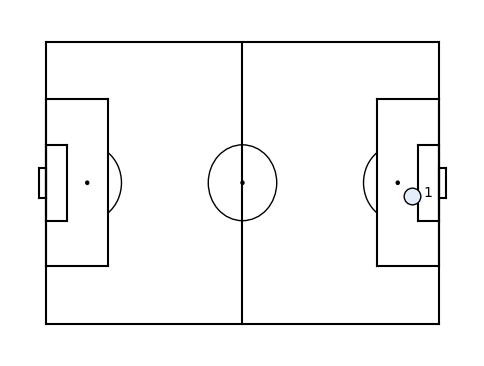

Fabián Ruiz Peña
69
Off T
0.03257165


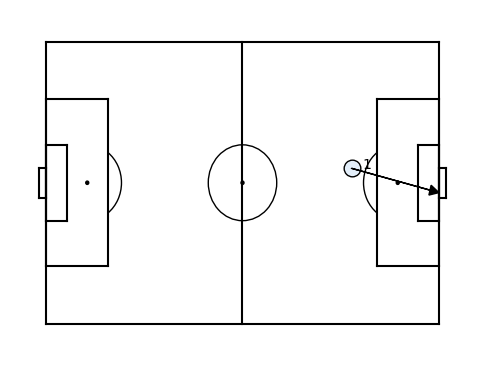

Ollie Watkins
69
Blocked
0.07470869


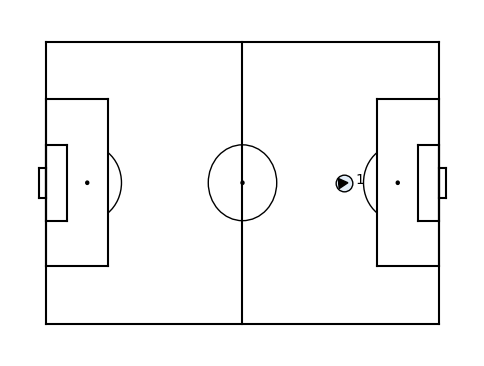

Mikel Oyarzabal Ugarte
71
Saved
0.037707567


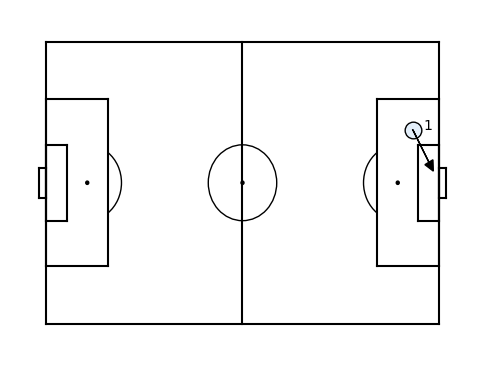

Cole Palmer
72
Goal
0.03794335


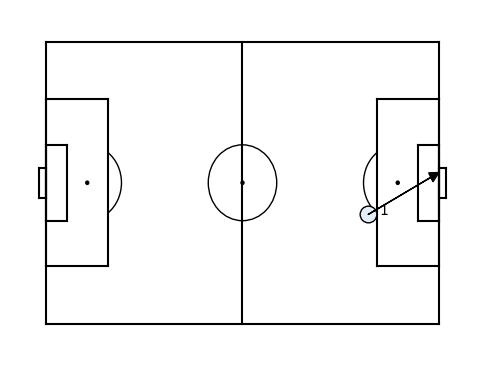

Lamine Yamal Nasraoui Ebana
81
Saved
0.16392969


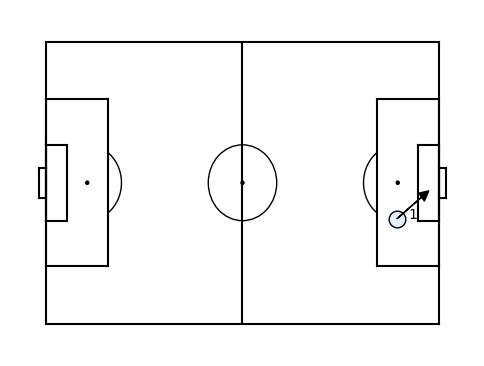

Mikel Oyarzabal Ugarte
85
Goal
0.2833282


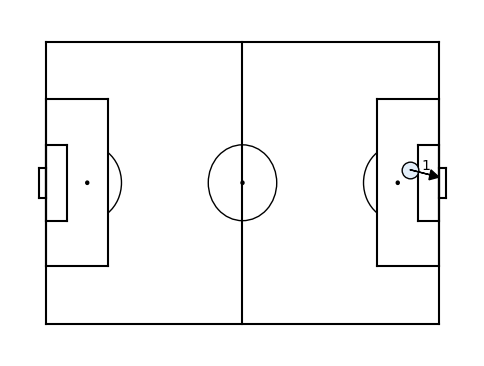

Declan Rice
89
Saved
0.057442125


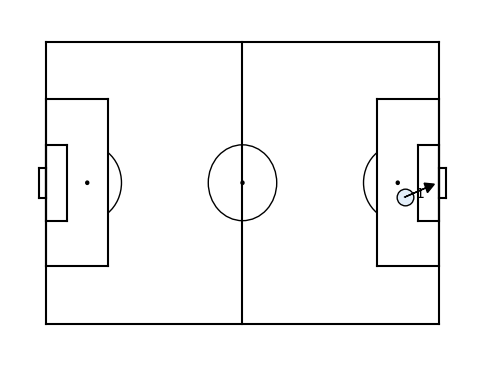

Marc Guehi
89
Blocked
0.117154144


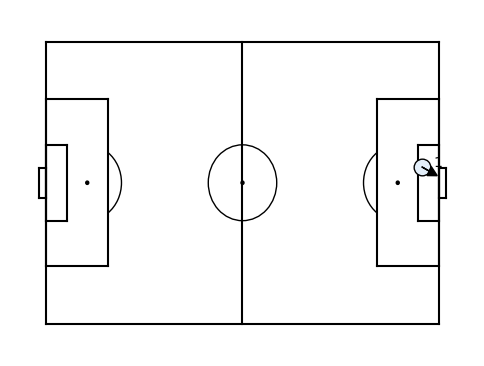

Declan Rice
89
Off T
0.10578214


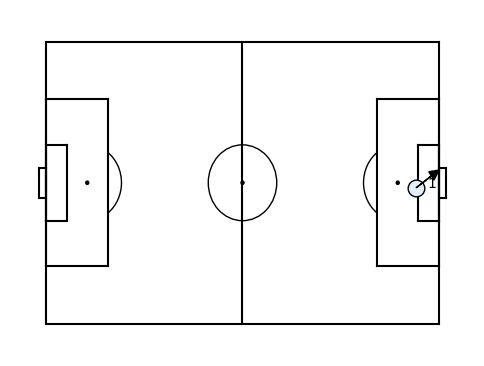

In [8]:
draw_each_shot()

In [9]:
shots= sb.events(match_id=match_id).query('type=="Shot"')
simple_shots = shots[['team', 'player', 'minute', 'shot_outcome', 'shot_statsbomb_xg']]

In [10]:
# xgでソートしてみる
simple_shots[['team', 'player', 'minute', 'shot_outcome', 'shot_statsbomb_xg']].sort_values('shot_statsbomb_xg', ascending=False)

,team,player,minute,shot_outcome,shot_statsbomb_xg
3249,Spain,Mikel Oyarzabal Ugarte,85,Goal,0.283328
3237,Spain,Daniel Olmo Carvajal,48,Off T,0.245579
3239,Spain,Álvaro Borja Morata Martín,54,Wayward,0.243106
3235,England,Phil Foden,45,Saved,0.179694
3248,Spain,Lamine Yamal Nasraoui Ebana,81,Saved,0.163930
3242,Spain,Lamine Yamal Nasraoui Ebana,65,Saved,0.162133
3229,Spain,Robin Aime Robert Le Normand,12,Off T,0.117465
3251,England,Marc Guehi,89,Blocked,0.117154
3236,Spain,Nicholas Williams Arthuer,46,Goal,0.112482
3252,England,Declan Rice,89,Off T,0.105782


In [11]:
simple_shots

,team,player,minute,shot_outcome,shot_statsbomb_xg
3228,Spain,Nicholas Williams Arthuer,11,Blocked,0.068030
3229,Spain,Robin Aime Robert Le Normand,12,Off T,0.117465
3230,England,Declan Rice,16,Blocked,0.048995
3231,Spain,Fabián Ruiz Peña,27,Saved,0.048117
3232,Spain,Daniel Olmo Carvajal,34,Blocked,0.026549
3233,Spain,Álvaro Borja Morata Martín,42,Blocked,0.078360
3234,England,Harry Kane,44,Blocked,0.048372
3235,England,Phil Foden,45,Saved,0.179694
3236,Spain,Nicholas Williams Arthuer,46,Goal,0.112482
3237,Spain,Daniel Olmo Carvajal,48,Off T,0.245579


In [12]:
england_simple_shots = simple_shots[simple_shots['team'] == 'England']
england_simple_shots

,team,player,minute,shot_outcome,shot_statsbomb_xg
3230,England,Declan Rice,16,Blocked,0.048995
3234,England,Harry Kane,44,Blocked,0.048372
3235,England,Phil Foden,45,Saved,0.179694
3241,England,Jude Bellingham,63,Off T,0.056286
3245,England,Ollie Watkins,69,Blocked,0.074709
3247,England,Cole Palmer,72,Goal,0.037943
3250,England,Declan Rice,89,Saved,0.057442
3251,England,Marc Guehi,89,Blocked,0.117154
3252,England,Declan Rice,89,Off T,0.105782


In [41]:
spain_simple_shots = simple_shots[simple_shots['team'] == 'Spain']
spain_simple_shots

,team,player,minute,shot_outcome,shot_statsbomb_xg
3228,Spain,Nicholas Williams Arthuer,11,Blocked,0.068030
3229,Spain,Robin Aime Robert Le Normand,12,Off T,0.117465
3231,Spain,Fabián Ruiz Peña,27,Saved,0.048117
3232,Spain,Daniel Olmo Carvajal,34,Blocked,0.026549
3233,Spain,Álvaro Borja Morata Martín,42,Blocked,0.078360
3236,Spain,Nicholas Williams Arthuer,46,Goal,0.112482
3237,Spain,Daniel Olmo Carvajal,48,Off T,0.245579
3238,Spain,Álvaro Borja Morata Martín,54,Blocked,0.025289
3239,Spain,Álvaro Borja Morata Martín,54,Wayward,0.243106
3240,Spain,Nicholas Williams Arthuer,55,Off T,0.049133


In [46]:
spain_simple_shots['cumulative_xg'] = spain_simple_shots['shot_statsbomb_xg'].cumsum()
spain_simple_shots

england_simple_shots['cumulative_xg'] = england_simple_shots['shot_statsbomb_xg'].cumsum()
england_simple_shots

# TODO: warning消す

/var/folders/l2/m3239vb94c76g075cksx68pr0000gn/T/ipykernel_7084/3518213115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spain_simple_shots['cumulative_xg'] = spain_simple_shots['shot_statsbomb_xg'].cumsum()
/var/folders/l2/m3239vb94c76g075cksx68pr0000gn/T/ipykernel_7084/3518213115.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  england_simple_shots['cumulative_xg'] = england_simple_shots['shot_statsbomb_xg'].cumsum()


,team,player,minute,shot_outcome,shot_statsbomb_xg,cumulative_xg
3230,England,Declan Rice,16,Blocked,0.048995,0.048995
3234,England,Harry Kane,44,Blocked,0.048372,0.097368
3235,England,Phil Foden,45,Saved,0.179694,0.277061
3241,England,Jude Bellingham,63,Off T,0.056286,0.333347
3245,England,Ollie Watkins,69,Blocked,0.074709,0.408056
3247,England,Cole Palmer,72,Goal,0.037943,0.445999
3250,England,Declan Rice,89,Saved,0.057442,0.503441
3251,England,Marc Guehi,89,Blocked,0.117154,0.620596
3252,England,Declan Rice,89,Off T,0.105782,0.726378


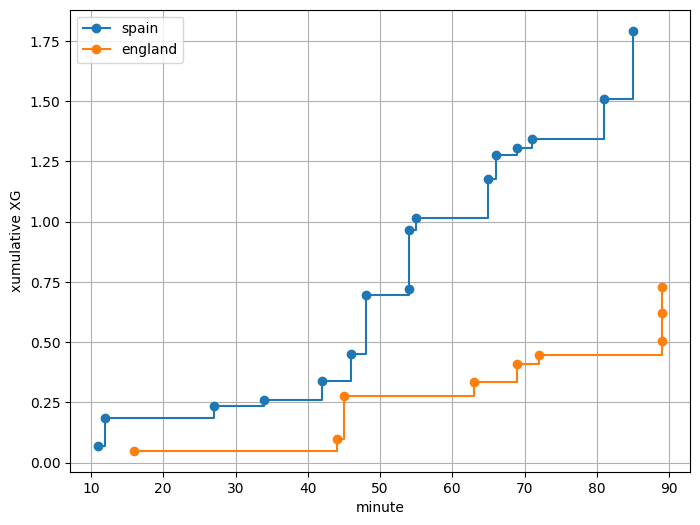

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.step(spain_simple_shots['minute'], spain_simple_shots['cumulative_xg'], where='post', marker='o', label='spain')
plt.step(england_simple_shots['minute'], england_simple_shots['cumulative_xg'], where='post', marker='o', label='england')

plt.xlabel('minute')
plt.ylabel('xumulative XG')
# plt.title('XGの累積グラフ')
plt.grid(True)
plt.legend()
plt.show()